0.0014660049284468102


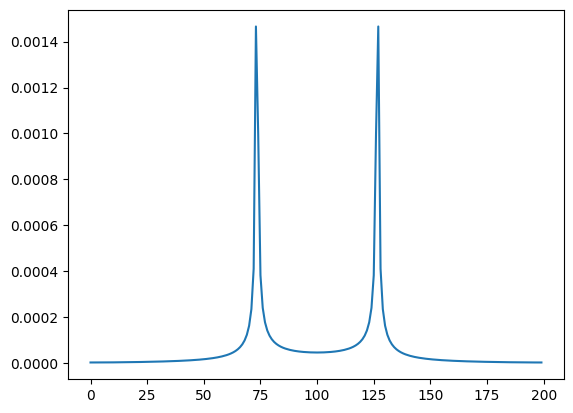

In [1]:
import math
import scipy.signal as sig
from scipy.fftpack import fft, ifft, fftshift
import numpy as np
import matplotlib.pyplot as plt
#!pip install fixedpoint
from fixedpoint import FixedPoint

def fixedToFloat(array):
  result = []
  for num in array:
    result.append(float(num))
  return result

def arrayFixedPointValue(initial_value, fx_array_len, qformat):
  # Retorna: un array con initial_value en todas sus posiciones, de longitud
  # fx_array_len, con el formato qformat = {'signed': ?, 'm': ?, 'n': ?}
  fx_type = FixedPoint(initial_value, **qformat)
  fx_array = [fx_type for _ in range(fx_array_len)]
  return fx_array

def arrayFixedPoint(initial_array, qformat):
  # Retorna: un array con los valores de initial_array convertidos
  # a fixed point, de la misma longitud
  # con el formato qformat = {'signed': ?, 'm': ?, 'n': ?}
  fx_array = []
  for num in initial_array:
    fx_num = FixedPoint(num, **qformat)
    fx_array.append(fx_num)
  return fx_array

F = 133
Fs = 1000
S = 200

t = np.arange(0, S/Fs, 1/Fs)

x = np.sin(2*np.pi*F*t)/256

spec_sig = fftshift(abs(fft(x)))/S
plt.plot(spec_sig)
print (np.amax(spec_sig))

0.0015971663260951289


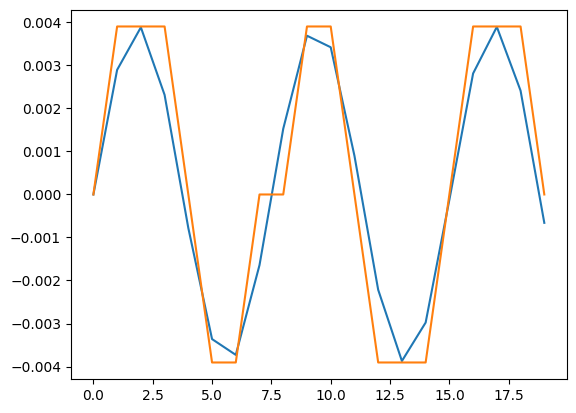

In [2]:
qformat = {'signed': True, 'm': 1, 'n': 8}

q_sig = arrayFixedPoint(x,qformat)

spec_sig = fftshift(abs(fft(q_sig))/S)
plt.plot(x[0:20])
plt.plot(q_sig[0:20])
print (np.amax(spec_sig))

0.001453787146675315


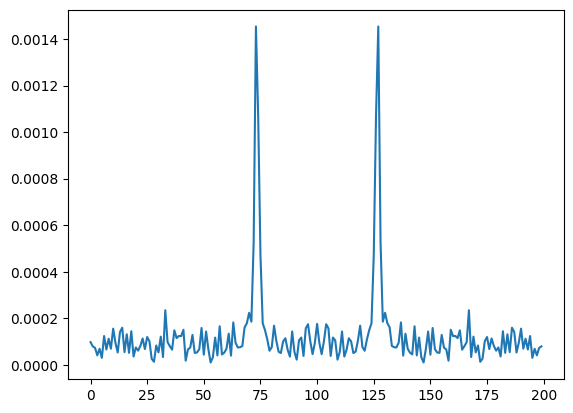

In [3]:
noise = np.random.normal(0,1/1024,len(x))
q_noise = arrayFixedPoint(noise,qformat)
q_sig_noise = np.array(arrayFixedPoint(x+noise,qformat)) - np.array( q_noise)
spec_q_sig_noise= fftshift(abs(fft(q_sig_noise))/S)

plt.plot(spec_q_sig_noise)
print (np.amax(spec_q_sig_noise))